# Cleaning Datasets for Image Classification with fastdup and Renumics Spotlight
This notebook aims at providing a blueprint on how you can **improve your machine learning data** in no time with fastdup and Renumics Spotlight. *fastdup* is an open source library scalable data curation, offering high-quality detection algorithms for uncovering the most common data problems. *Renumics Spotlight* is an open source tool for interactively visualizing datasets and machine learning results. Combined they can be a powerful way to automatically detect data issues and discover systematic patterns in the detection results. They will help you improve your data in a quick and effective manner!

In [25]:
!pip install -U pandas fastdup renumics-spotlight sliceguard[all]

  Using cached renumics_spotlight-1.3.0-py3-none-any.whl (2.5 MB)
  Using cached sliceguard-0.0.22-py3-none-any.whl (24 kB)
  Using cached hnne-0.1.9-py3-none-any.whl
  Using cached dash-2.13.0-py3-none-any.whl (10.4 MB)
  Using cached fairlearn-0.9.0-py3-none-any.whl (231 kB)
  Using cached plotly-5.16.1-py2.py3-none-any.whl (15.6 MB)
  Using cached datasets-2.14.4-py3-none-any.whl (519 kB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Using cached transformers-4.32.1-py3-none-any.whl (7.5 MB)
  Using cached FLAML-2.0.1-py3-none-any.whl (295 kB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached torchaudio-2.0.2-cp310-cp310-manylinux1_x86_64.whl (4.4 MB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
INFO: pip is looking at multiple versions of sliceguard[all] to determine which version is compatible with other requirements. This could take a while.
  Using cached sliceguard-0.0.21-py3-none-any.whl (24 kB)


In [1]:
from pathlib import Path
import pandas as pd
from renumics import spotlight
import fastdup

/usr/bin/dpkg


In [2]:
INPUT_DIR = Path("/home/daniel/data/license_plates")

In [3]:
# Load the data
train_df = pd.read_csv(INPUT_DIR / "train.csv")
train_df["split"] = "train"
test_df = pd.read_csv(INPUT_DIR / "test.csv")
test_df["split"] = "test"
df = pd.concat((train_df, test_df))
df = df.rename(columns={"Image": "filename", "Label": "label"})
df["filename"] = df.apply(lambda row: str(INPUT_DIR / "data" / row["label"] /row["filename"]), axis=1)

In [4]:
df

,label,filename,split
0,Oklahoma,/home/daniel/data/license_plates/data/Oklahoma/3bee0f9774d98e.jpg,train
1,Maryland,/home/daniel/data/license_plates/data/Maryland/c721fc8835807c.jpg,train
2,Nevada,/home/daniel/data/license_plates/data/Nevada/bb8fe304434127.jpg,train
3,Wyoming,/home/daniel/data/license_plates/data/Wyoming/8242a974d5e154.jpg,train
4,Wyoming,/home/daniel/data/license_plates/data/Wyoming/66a962c5a3605c.jpg,train
...,...,...,...
442,Utah,/home/daniel/data/license_plates/data/Utah/b13e4ec47aa127.jpg,test
443,WashingtonDC,/home/daniel/data/license_plates/data/WashingtonDC/8a9342d9b114b8.jpg,test
444,Vermont,/home/daniel/data/license_plates/data/Vermont/d313026cffe30c.jpg,test
445,NewYork,/home/daniel/data/license_plates/data/NewYork/9b702e5aca6c97.jpg,test


In [5]:
fd = fastdup.create(input_dir =INPUT_DIR / "data")
fd.run(annotations=df, overwrite=True) # Detect data issues using fastdup

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-08-30 11:02:41 [INFO] Going to loop over dir /tmp/tmpxl_xwfm0.csv
2023-08-30 11:02:41 [INFO] Found total 4463 images to run on, 4463 train, 0 test, name list 4463, counter 4463 
2023-08-30 11:02:52 [INFO] Found total 4463 images to run ontimated: 0 Minutes
Finished histogram 1.003
Finished bucket sort 1.013
2023-08-30 11:02:52 [INFO] 67) Finished write_index() NN model
2023-08-30 11:02:52 [INFO] Stored nn model index file work_dir/nnf.index
2023-08-30 11:02:52 [INFO] Total time took 11186 ms
2023-08-30 11:02:52 [INFO] Found a total of 14 fully identical images (d>0.990), which are 0.16 %
2023-08-30 11:02:52 [INFO] Found a total of 50 nearly identical images(d>0.980), which are 0.56 %
2023-08-30 11:02:52 [INFO] Found a total of 6399 above threshold images (d>0.900), which are 71.69 %
2023-08-30 11:02:52 [INFO] Found a total of 446 outlier images         (d<0.050), which are 5.00 %
2023-08-30 11:02:52 [INFO] 

0

# Check the data for outliers

## Get a first overview using fastdup

100%|███████████████████████████████████████| 20/20 [00:00<00:00, 33907.07it/s]


Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



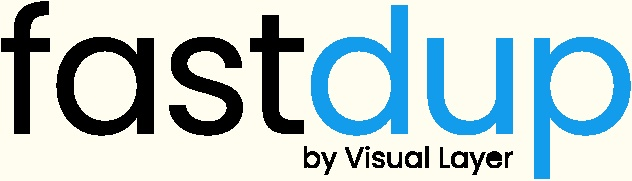
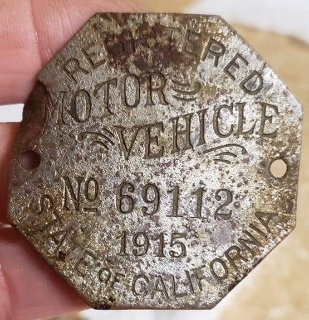
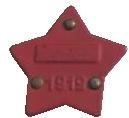
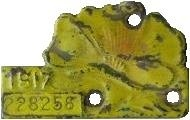
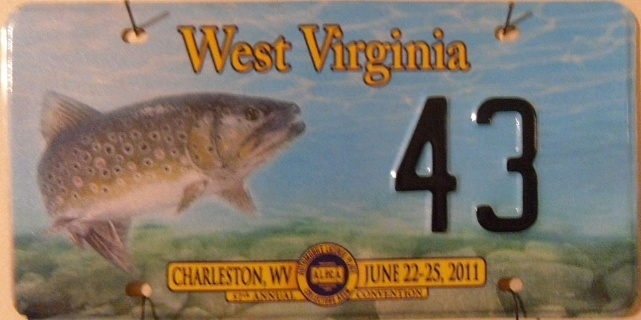
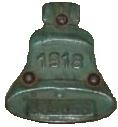
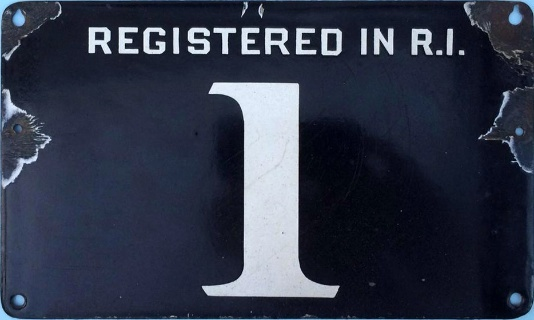
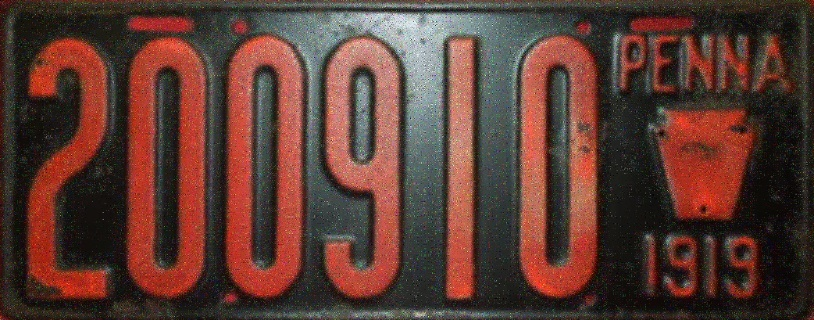
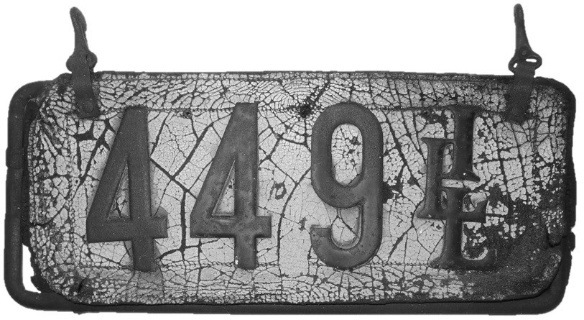
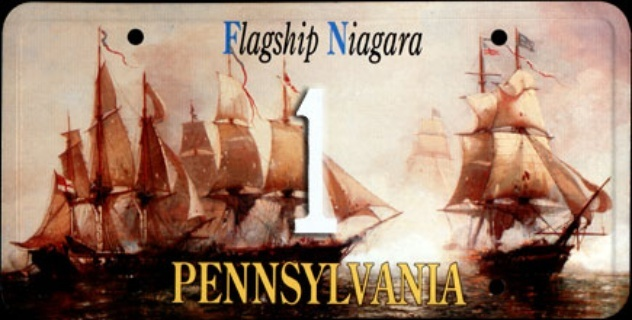
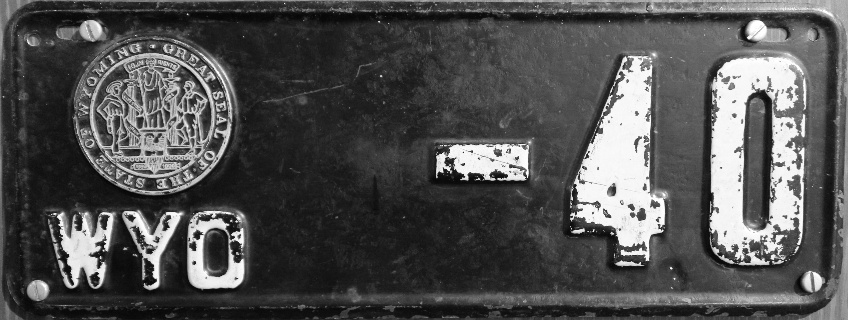
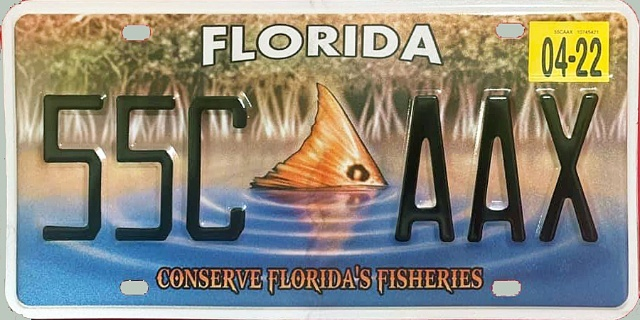
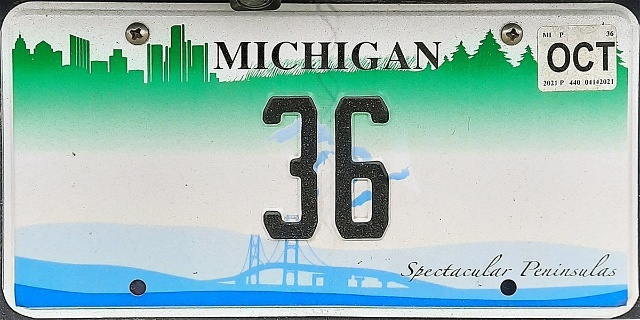
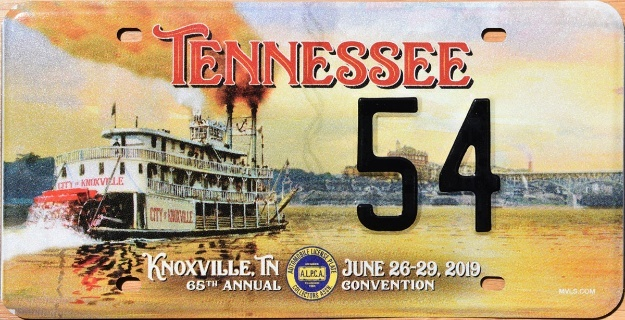
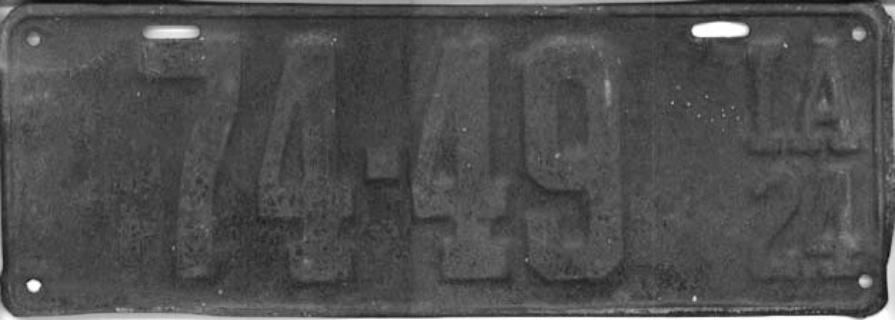
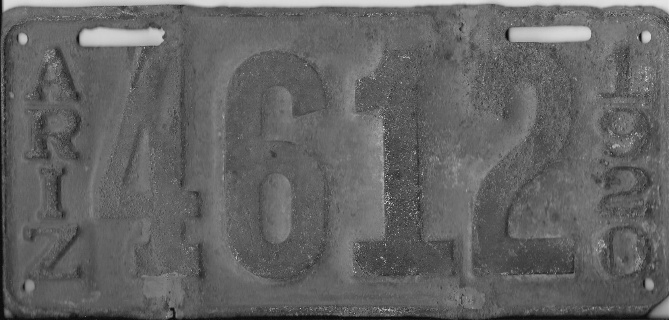
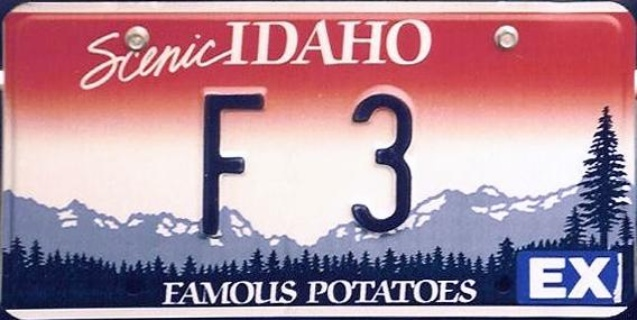
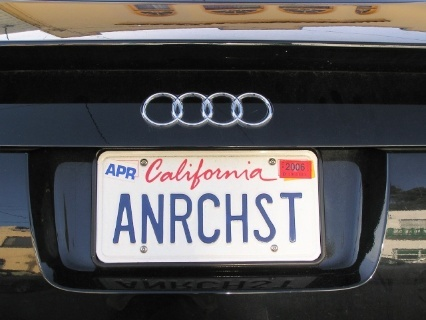
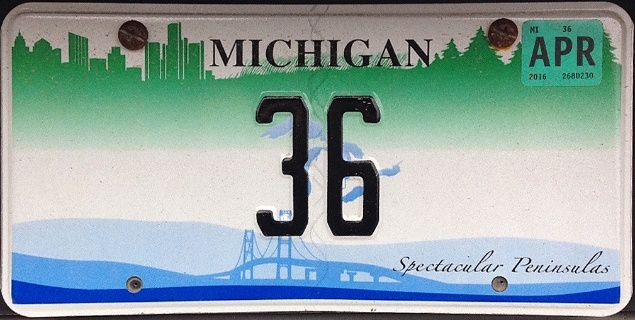
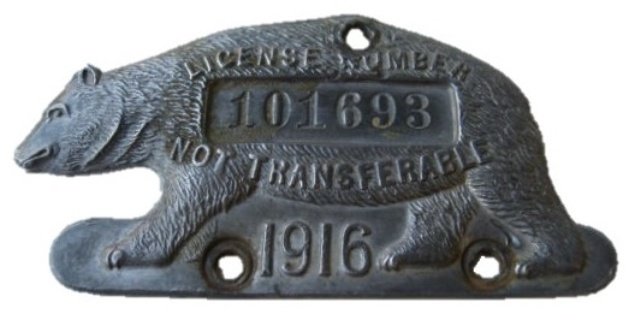
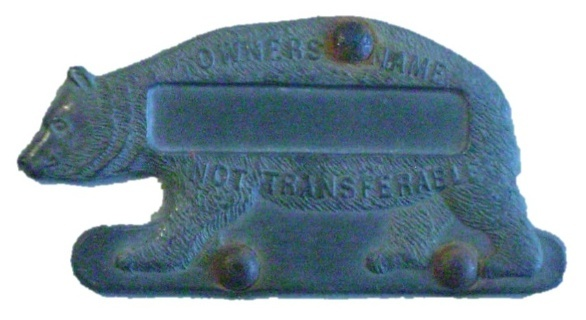

0

In [7]:
fd.vis.outliers_gallery()

## Discover patterns using Renumics Spotlight
fastdup's report already gives us a good first overview on severe outliers in the data. If you want to find out if there are systematic **outlier patterns**, which are possibly related to specific classes, you can use Renumics Spotlight for an **interactive analysis** of fastdup's detection results.

In [13]:
outlier_df = fd.outliers()
_, embeddings = fd.embeddings()
outlier_df["embedding"] = embeddings[outlier_df["outlier"]].tolist()

Read a total of  4463 images


In [14]:
spotlight.show(outlier_df, dtype={"embedding": spotlight.Embedding, "filename_outlier": spotlight.Image, "filename_nearest": spotlight.Image}, layout="spotlight-layout-outlier.json")

**Result**:
![Spotlight Outlier View](img/outliers_spotlight.png)

Spotlight will give you additional possibilities to interactively explore the outliers detected by fastdup and answer questions such as:
1. How are the outliers **distributed** across classes
2. Where are **clusters** of outliers that share similar properties
3. Are outliers fastdup detects in the image data **explainable via metadata** you might have
4. ...